<h3 align=center> In His Name, the Most High </h3>

In [1]:
#importing libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn') # beautiful plots :O

## ATIS Dataset EDA

The ATIS dataset is a standard benchmark dataset widely used for intent classification and slot filling.
here we obtained the dataset from https://github.com/yvchen/JointSLU.

In [2]:
#importing train data
train_tokens = list()
train_tags = list()
train_intents = list()
with open('atis-2.train+dev.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): words.append(word.lower()) #lowerizing tokens
        train_tokens.append(words)
        
        tokens = list()
        for token in line[index + 2:-1]:
            tokens.append(token)
        train_tags.append(tokens)
                    
        #handling entries with multiple intent
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                train_intents.append(item)
                break
        else:
            train_intents.append(line[-1])
            
print('# of train dataset rows:', len(train_tokens))
print('# of train dataset unique intents:', len(set(train_intents)))
print('# of train dataset unique IOB tags:', len(set([tag for item in train_tags for tag in item])))

# of train dataset rows: 4978
# of train dataset unique intents: 17
# of train dataset unique IOB tags: 121


In [3]:
ind = 0
print('tokens:', train_tokens[ind])
print('IOB tags:', train_tags[ind])
print('intent:', train_intents[ind])

tokens: ['i', 'want', 'to', 'fly', 'from', 'baltimore', 'to', 'dallas', 'round', 'trip']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'B-round_trip', 'I-round_trip']
intent: atis_flight


In [4]:
train_intents_freq = dict()
for intent in train_intents:
    train_intents_freq[intent] = train_intents.count(intent)
train_intents_freq

{'atis_flight': 3687,
 'atis_airfare': 424,
 'atis_airline': 159,
 'atis_ground_service': 256,
 'atis_quantity': 51,
 'atis_city': 19,
 'atis_abbreviation': 147,
 'atis_aircraft': 82,
 'atis_distance': 20,
 'atis_ground_fare': 18,
 'atis_capacity': 16,
 'atis_flight_time': 54,
 'atis_meal': 6,
 'atis_flight_no': 12,
 'atis_restriction': 6,
 'atis_airport': 20,
 'atis_cheapest': 1}

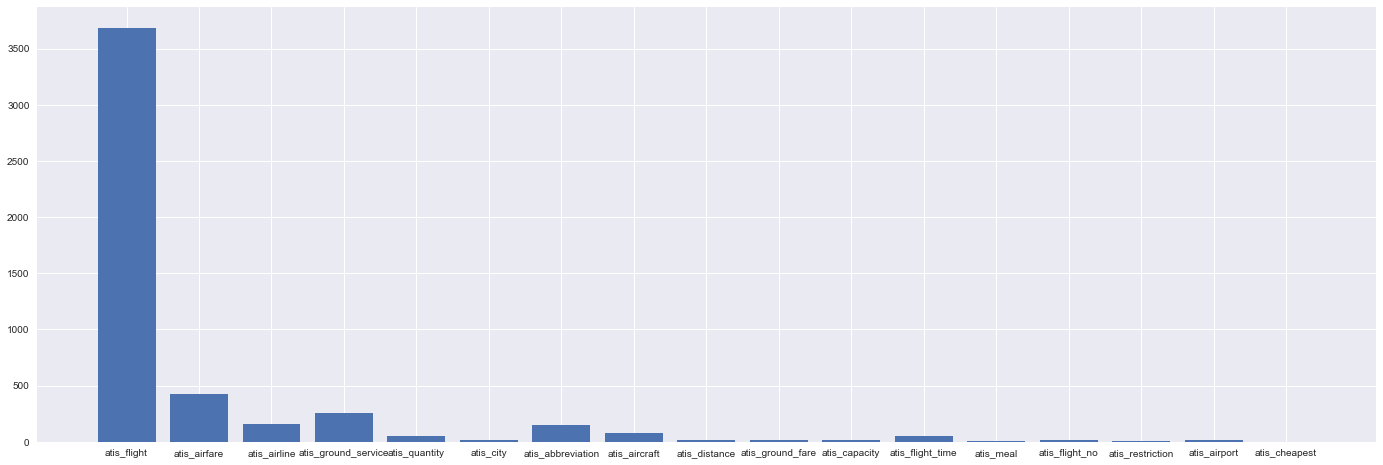

In [5]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_freq.keys()),train_intents_freq.values())
plt.show()

In [6]:
train_tags_freq = dict()
for item in train_tags:
    for tag in item:
        if (tag in train_tags_freq): train_tags_freq[tag] += item.count(tag)
        else: train_tags_freq[tag] = item.count(tag)
train_tags_freq

{'O': 304501,
 'B-fromloc.city_name': 4670,
 'B-toloc.city_name': 4777,
 'B-round_trip': 374,
 'I-round_trip': 361,
 'B-cost_relative': 366,
 'B-fare_amount': 73,
 'I-fare_amount': 71,
 'B-arrive_date.month_name': 47,
 'B-arrive_date.day_number': 47,
 'I-fromloc.city_name': 841,
 'B-stoploc.city_name': 243,
 'B-arrive_time.time_relative': 203,
 'B-arrive_time.time': 224,
 'I-arrive_time.time': 191,
 'B-toloc.state_code': 86,
 'I-toloc.city_name': 1289,
 'I-stoploc.city_name': 75,
 'B-meal_description': 57,
 'B-depart_date.month_name': 387,
 'B-depart_date.day_number': 413,
 'B-airline_name': 743,
 'I-airline_name': 449,
 'B-depart_time.period_of_day': 707,
 'B-depart_date.day_name': 1001,
 'B-toloc.state_name': 77,
 'B-depart_time.time_relative': 343,
 'B-depart_time.time': 391,
 'B-toloc.airport_name': 39,
 'I-toloc.airport_name': 77,
 'B-depart_date.date_relative': 82,
 'B-or': 84,
 'B-airline_code': 148,
 'B-class_type': 225,
 'I-class_type': 189,
 'I-cost_relative': 55,
 'I-depart_

In [7]:
#importing test data
test_tokens = list()
test_tags = list()
test_intents = list()
with open('atis.test.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): words.append(word.lower()) #lowerizing tokens
        
        test_tokens.append(words)
        
        tokens = list()
        for token in line[index + 2:-1]:
            tokens.append(token)
        test_tags.append(tokens)
                    
        #handling entries with multiple intent
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                test_intents.append(item)
                break
        else:
            test_intents.append(line[-1])
            
print('# of test dataset rows:', len(test_tokens))
print('# of test dataset unique intents:', len(set(test_intents)))
print('# of test dataset unique IOB tags:', len(set([tag for item in test_tags for tag in item])))

# of test dataset rows: 893
# of test dataset unique intents: 16
# of test dataset unique IOB tags: 101


In [8]:
ind = 0
print('tokens:', test_tokens[ind])
print('IOB tags:', test_tags[ind])
print('intent:', test_intents[ind])

tokens: ['i', 'would', 'like', 'to', 'find', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'makes', 'a', 'stop', 'in', 'st.', 'louis']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name']
intent: atis_flight


In [9]:
test_intents_freq = dict()
for intent in test_intents:
    test_intents_freq[intent] = test_intents.count(intent)
test_intents_freq

{'atis_flight': 645,
 'atis_airfare': 49,
 'atis_ground_service': 36,
 'atis_day_name': 2,
 'atis_meal': 6,
 'atis_airport': 18,
 'atis_airline': 38,
 'atis_flight_time': 1,
 'atis_city': 6,
 'atis_ground_fare': 7,
 'atis_quantity': 3,
 'atis_abbreviation': 33,
 'atis_distance': 10,
 'atis_aircraft': 9,
 'atis_capacity': 21,
 'atis_flight_no': 9}

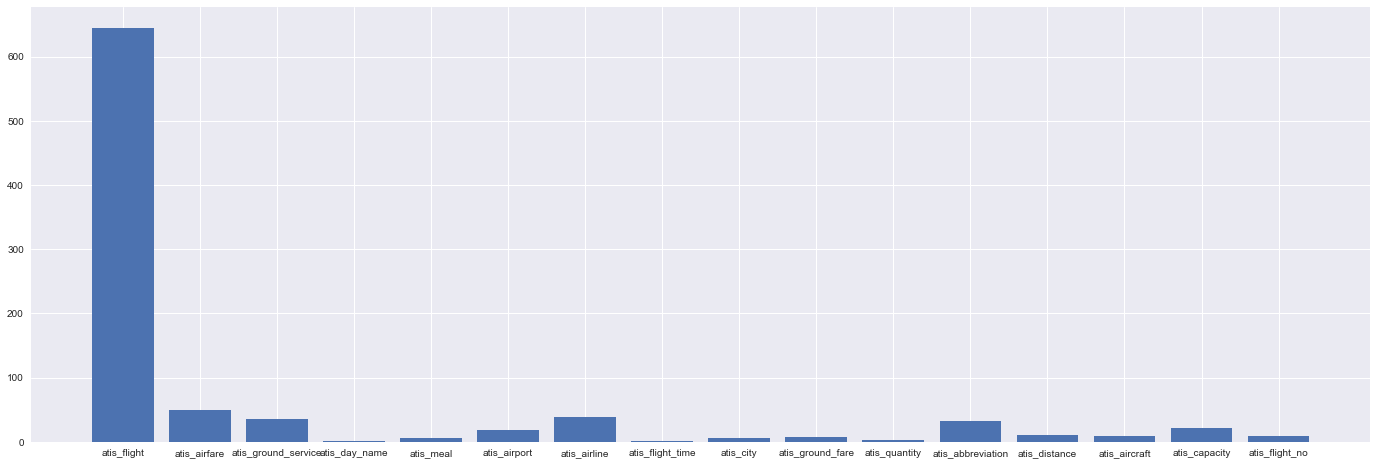

In [10]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_freq.keys()),test_intents_freq.values())
plt.show()

In [11]:
test_tags_freq = dict()
for item in test_tags:
    for tag in item:
        if (tag in test_tags_freq): test_tags_freq[tag] += item.count(tag)
        else: test_tags_freq[tag] = item.count(tag)
test_tags_freq

{'O': 39659,
 'B-fromloc.city_name': 730,
 'B-toloc.city_name': 764,
 'I-toloc.city_name': 369,
 'B-stoploc.city_name': 20,
 'I-stoploc.city_name': 10,
 'B-depart_date.month_name': 56,
 'B-depart_date.day_number': 55,
 'B-depart_time.time_relative': 65,
 'B-depart_time.time': 57,
 'I-depart_time.time': 52,
 'B-round_trip': 73,
 'I-round_trip': 71,
 'B-airline_name': 125,
 'I-airline_name': 75,
 'B-depart_date.day_name': 222,
 'B-depart_time.period_of_day': 142,
 'I-fromloc.city_name': 203,
 'B-meal_description': 10,
 'B-depart_date.date_relative': 17,
 'B-arrive_time.time_relative': 33,
 'B-arrive_time.time': 34,
 'I-arrive_time.time': 37,
 'B-return_date.day_name': 2,
 'B-arrive_date.date_relative': 2,
 'B-arrive_date.day_name': 11,
 'B-flight_stop': 21,
 'B-depart_date.today_relative': 9,
 'B-toloc.state_name': 28,
 'B-arrive_date.month_name': 6,
 'B-arrive_date.day_number': 6,
 'B-arrive_time.start_time': 8,
 'B-arrive_time.end_time': 8,
 'I-arrive_time.end_time': 8,
 'B-airport_nam

In [12]:
set(test_intents).difference(set(train_intents))

{'atis_day_name'}

so from above, we see there are no train data for 'atis_day_name'...

In [13]:
set(train_intents).difference(set(test_intents))

{'atis_cheapest', 'atis_restriction'}

and there are no test data for 'atis_cheapest' & 'atis_restriction'...

In [14]:
set(test_tags_freq.keys()).difference(set(train_tags_freq.keys()))

{'B-booking_class',
 'B-compartment',
 'B-flight',
 'B-stoploc.airport_code',
 'I-flight_number',
 'I-state_name'}

also we see there are no train data with 'B-stoploc.airport_code' or 'B-booking_class' or 'I-flight_number' or 'I-state_name' or 'B-flight' or 'B-compartment' tag...

In [15]:
set(train_tags_freq.keys()).difference(set(test_tags_freq.keys()))

{'B-arrive_date.today_relative',
 'B-arrive_time.period_mod',
 'B-day_number',
 'B-month_name',
 'B-return_date.day_number',
 'B-return_date.month_name',
 'B-return_date.today_relative',
 'B-return_time.period_mod',
 'B-return_time.period_of_day',
 'B-stoploc.airport_name',
 'B-stoploc.state_code',
 'B-time',
 'B-time_relative',
 'B-today_relative',
 'I-arrive_date.day_number',
 'I-arrive_time.period_of_day',
 'I-depart_date.today_relative',
 'I-economy',
 'I-fare_basis_code',
 'I-flight_stop',
 'I-meal_code',
 'I-meal_description',
 'I-return_date.day_number',
 'I-return_date.today_relative',
 'I-time',
 'I-today_relative'}

and finally there are no train data with 'I-return_date.day_number' or 'B-return_time.period_mod' or ... tag.

In [16]:
#TO-DO: find and remove duplicates if exists in train dataset?
#TO-DO: research on imbalance data handling techniques